# Question 2: Predictive Modeling and Scenario Analysis 
**Task**: 
Develop a predictive model to forecast CO2 emissions based on the comprehensive set of 
indicators. Use the model to answer an analytical question: “If a country increases its GDP 
by 10%, what is the expected percentage change in CO2 emissions, assuming all other 
factors remain constant?” 
 
**Instructions**: 
1. Split the data into training and testing sets. 
2. Train a regression model using the socio-economic and environmental indicators as 
predictors. 
3. Evaluate the model's performance using appropriate metrics (e.g., RMSE, R²). 
4. Simulate the scenario where GDP increases by 10% across different countries, keeping 
other factors constant. 
5. Analyze and interpret the results, providing a range of expected changes in CO2 
emissions across nations. 

**How to use**
- You can run all cells.
- Please refer to the deliverables folder and the [q2.md](deliverables/q2.md) file for an overview of implementation and results.

In [1]:
import pandas as pd
from helpers import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,  Lasso, Ridge
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clean_data/initial_q2.csv')
df.head()

,Country Name,Year,Value,Indicator Name
0,Australia,1990,5061.500154,en_use
1,Austria,1990,3240.111359,en_use
2,Belgium,1990,4809.867268,en_use
3,Canada,1990,7630.092306,en_use
4,Switzerland,1990,3627.692811,en_use


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    6916 non-null   object 
 1   Year            6916 non-null   int64  
 2   Value           6916 non-null   float64
 3   Indicator Name  6916 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 216.3+ KB


In [4]:
# Extract CO2 emissions
target_df = df[df["Indicator Name"].str.contains("cotwo_emi")].reset_index(drop=True)
features_df = df[~df["Indicator Name"].str.contains("cotwo_emi")].reset_index(drop=True)


In [5]:
print(target_df.head())
print(features_df.head())

  Country Name  Year     Value Indicator Name
0    Australia  1990  263437.5      cotwo_emi
1      Austria  1990   58275.7      cotwo_emi
2      Belgium  1990  109312.6      cotwo_emi
3       Canada  1990  419492.2      cotwo_emi
4  Switzerland  1990   43326.5      cotwo_emi
  Country Name  Year        Value Indicator Name
0    Australia  1990  5061.500154         en_use
1      Austria  1990  3240.111359         en_use
2      Belgium  1990  4809.867268         en_use
3       Canada  1990  7630.092306         en_use
4  Switzerland  1990  3627.692811         en_use


In [6]:
# Pivot the data to have years as rows and indicators as columns
target_df_pivot = target_df.pivot_table(index=["Country Name", "Year"], columns="Indicator Name", values="Value").reset_index()
features_df_pivot = features_df.pivot_table(index=["Country Name", "Year"], columns="Indicator Name", values="Value").reset_index()

print('-------- target_df_pivot ---------\n', target_df_pivot.head())
print('-------- features_df_pivot --------\n', features_df_pivot.head())

-------- target_df_pivot ---------
 Indicator Name Country Name  Year  cotwo_emi
0                 Australia  1990   263437.5
1                 Australia  1991   264709.7
2                 Australia  1992   268366.5
3                 Australia  1993   273016.9
4                 Australia  1994   280096.3
-------- features_df_pivot --------
 Indicator Name Country Name  Year       en_use           gdp  popu_total  \
0                 Australia  1990  5061.500154  3.114205e+11  17065128.0   
1                 Australia  1991  4927.771326  3.259667e+11  17284036.0   
2                 Australia  1992  4963.858162  3.255185e+11  17478635.0   
3                 Australia  1993  5156.933379  3.121283e+11  17634808.0   
4                 Australia  1994  5103.947956  3.228025e+11  17805468.0   

Indicator Name  prim_comp_rate  ren_elec_out  urban_popu  
0                    51.212158      9.656031  14579251.0  
1                    76.901360     10.598201  14761085.0  
2                    53

In [7]:
print(target_df_pivot.shape)
print(features_df_pivot.shape)

(988, 3)
(988, 8)


In [8]:
model_evaluation = ModelEvaluation()
# Create test and train sets
X = features_df_pivot.drop(columns=["Country Name", "Year"])
y = target_df_pivot["cotwo_emi"]

results = []

# Experiments to find best model and other parameters
results.append(model_evaluation.run_q2_regression_experiment(LinearRegression(), X, y, poly_degree=None))
results.append(model_evaluation.run_q2_regression_experiment(LinearRegression(), X, y, poly_degree=2))
results.append(model_evaluation.run_q2_regression_experiment(Lasso(), X, y, poly_degree=None))
results.append(model_evaluation.run_q2_regression_experiment(Ridge(), X, y, poly_degree=None))
results.append(model_evaluation.run_q2_regression_experiment(Lasso(), X, y, poly_degree=2))
results.append(model_evaluation.run_q2_regression_experiment(Ridge(), X, y, poly_degree=2))
results_df = pd.DataFrame(results)
print(results_df)


              Model  Poly Degree  Scaling   Average RMSE  Average R²
0  LinearRegression          NaN     True  268118.725462    0.896729
1  LinearRegression          2.0     True   48047.180916    0.996733
2             Lasso          NaN     True  268120.639251    0.896715
3             Ridge          NaN     True  268894.276985    0.895847
4             Lasso          2.0     True   49931.780479    0.996363
5             Ridge          2.0     True   49238.621234    0.996440


/home/tony-ubuntu/anaconda3/envs/practical_exam_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 6.186e+10
  model = cd_fast.enet_coordinate_descent(
/home/tony-ubuntu/anaconda3/envs/practical_exam_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.625e+13, tolerance: 5.488e+10
  model = cd_fast.enet_coordinate_descent(
/home/tony-ubuntu/anaconda3/envs/practical_exam_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

In [9]:
# Training a linear regression model with the best parameter we found
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_polynomial = poly.fit_transform(X_train)
X_test_polynomial = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_polynomial)
X_test_scaled = scaler.transform(X_test_polynomial)


model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Scenario Simulation
X_test_scenario = X_test.copy()

# Increase GDP by 10%
X_test_scenario["gdp"] *= 1.10

X_test_scenario_poly = poly.transform(X_test_scenario)
X_test_scenario_scaled = scaler.transform(X_test_scenario_poly)

y_pred_scenario = model.predict(X_test_scenario_scaled)

# Calculate the percentage change in CO2 emissions
percentage_change = ((y_pred_scenario - y_pred) / y_pred) * 100

average_change = np.mean(percentage_change)
print(f"Average percentage change in CO2 emissions: {average_change}%")

RMSE: 50039.91684759645
R²: 0.9957532227638959
Average percentage change in CO2 emissions: -0.3874761887839257%


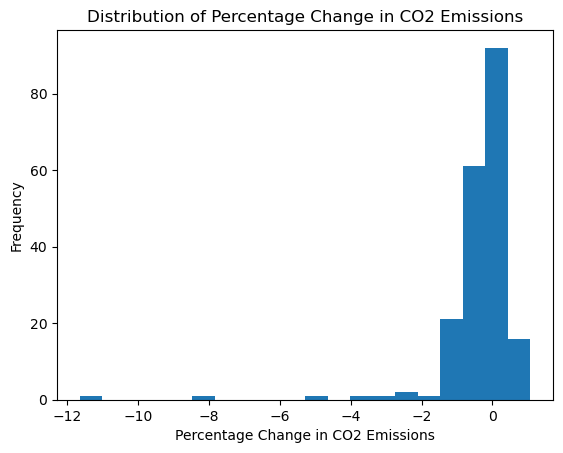

In [10]:
plt.hist(percentage_change, bins=20)
plt.xlabel("Percentage Change in CO2 Emissions")
plt.ylabel("Frequency")
plt.title("Distribution of Percentage Change in CO2 Emissions")
plt.show()